---

<h1 style="text-align:center">THÍ NGHIỆM</h1>

---

| Thông số ảnh hưởng |
|--------------------|
| Kích thước quần thể |

# Tình huống tổng quan: 
Các bài toán Knapsack trong 6 test case có số lượng vật phẩm và công suất tối đa khác nhau. Các thuật toán di truyền sử dụng quần thể với kích thước từ 50 đến 500 cá thể, và các yếu tố đo lường gồm:

- Fitness cuối cùng: Giá trị tối ưu của quần thể sau khi chạy thuật toán.
- Tốc độ hội tụ: Số thế hệ cần thiết để đạt được kết quả tối ưu.
- Độ ổn định (std): Sự thay đổi trong Fitness giữa các cá thể trong quần thể.

In [89]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from Genetic_Algorithm import * 

### Nhập số liệu tính toán:

In [90]:
items, max_capacity = get_user_input()
get_info()


Thông tin bài toán:

Vật phẩm 1: Weight = 330, Value = 2870
Vật phẩm 2: Weight = 176, Value = 308
Vật phẩm 3: Weight = 2431, Value = 570
Vật phẩm 4: Weight = 2808, Value = 137
Vật phẩm 5: Weight = 1038, Value = 445
Vật phẩm 6: Weight = 3996, Value = 771
Vật phẩm 7: Weight = 3193, Value = 108
Vật phẩm 8: Weight = 805, Value = 469
Vật phẩm 9: Weight = 627, Value = 3678
Vật phẩm 10: Weight = 2257, Value = 2760
Vật phẩm 11: Weight = 1649, Value = 842
Vật phẩm 12: Weight = 1210, Value = 1237
Vật phẩm 13: Weight = 2642, Value = 1829
Vật phẩm 14: Weight = 508, Value = 967
Vật phẩm 15: Weight = 1192, Value = 313
Vật phẩm 16: Weight = 3446, Value = 1322
Vật phẩm 17: Weight = 3626, Value = 651
Vật phẩm 18: Weight = 1706, Value = 679
Vật phẩm 19: Weight = 3068, Value = 2254
Vật phẩm 20: Weight = 2977, Value = 525
Vật phẩm 21: Weight = 1688, Value = 1571
Vật phẩm 22: Weight = 709, Value = 697
Vật phẩm 23: Weight = 3522, Value = 2262
Vật phẩm 24: Weight = 85, Value = 3065
Vật phẩm 25: Weight = 335

### Ghi lại thông số thay đổi với từng kích thước quần thể

In [91]:
# Thực hiện thử nghiệm với các kích thước quần thể khác nhau
population_sizes = [50, 100, 200, 500]
experiment_results = {}

def run_experiment_with_population(pop_size):
    global POPULATION_SIZE, fitness_history
    
    # Lưu giá trị POPULATION_SIZE ban đầu
    original_pop_size = POPULATION_SIZE
    
    # Thay đổi POPULATION_SIZE cho thử nghiệm
    POPULATION_SIZE = pop_size
    
    # Thực hiện thuật toán di truyền
    best_solution, best_fitness = genetic_algorithm()
    
    # Lưu kết quả
    result = {
        'best_solution': best_solution,
        'best_fitness': best_fitness,
        'fitness_history': fitness_history.copy()  # Lưu lại lịch sử fitness
    }
    
    # Reset fitness_history sau mỗi lần thử nghiệm
    fitness_history.clear()
    
    # Khôi phục giá trị POPULATION_SIZE ban đầu
    POPULATION_SIZE = original_pop_size
    
    return result

# Thực hiện các thử nghiệm cho các kích thước quần thể khác nhau
for pop_size in population_sizes:
    print(f"\nThử nghiệm với kích thước quần thể: {pop_size}")
    
    # Chạy thử nghiệm
    result = run_experiment_with_population(pop_size)
    
    # Lưu kết quả vào experiment_results
    experiment_results[pop_size] = result
    
    print(f"Best Solution: {result['best_solution']}")
    print(f"Best Fitness: {result['best_fitness']}")
    print(f"Fitness History: {result['fitness_history']}")



Thử nghiệm với kích thước quần thể: 50
Best Solution: [1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0]
Best Fitness: 48391
Fitness History: [38779, 40188, 40758, 38881, 44886, 44850, 42830, 48174, 48174, 45115, 46981, 47089, 43933, 41671, 45729, 42639, 43318, 37637, 40683, 45503, 45058, 43051, 40194, 43876, 43425, 41517, 44236, 46418, 40019, 42217, 42403, 43464, 43464, 43055, 47590, 44113, 42164, 42272, 37419, 38318, 38303, 40516, 39950, 42593, 41194, 42437, 42225, 42590, 39540, 45204, 44570, 42435, 42159, 43932, 42022, 41629, 41498, 43346, 42353, 41110, 41824, 42381, 44172, 44124, 43614, 46377, 48391, 42328, 39080, 38363, 38363, 41281, 41281, 39461, 39864, 43811, 42125, 42422, 41692, 41514, 40002, 41027, 40881, 43109, 38217, 39208, 40568, 39212, 44051, 42865, 39329, 40238, 41203, 41222, 39500, 39835, 40302, 41462, 42330, 44568, 44568, 44730, 44730, 41530, 43004, 41605, 42175, 43066, 43066, 42188, 41207, 43363,

### Fitness qua các thế hệ với thông số kích thước quần thể giống nhau

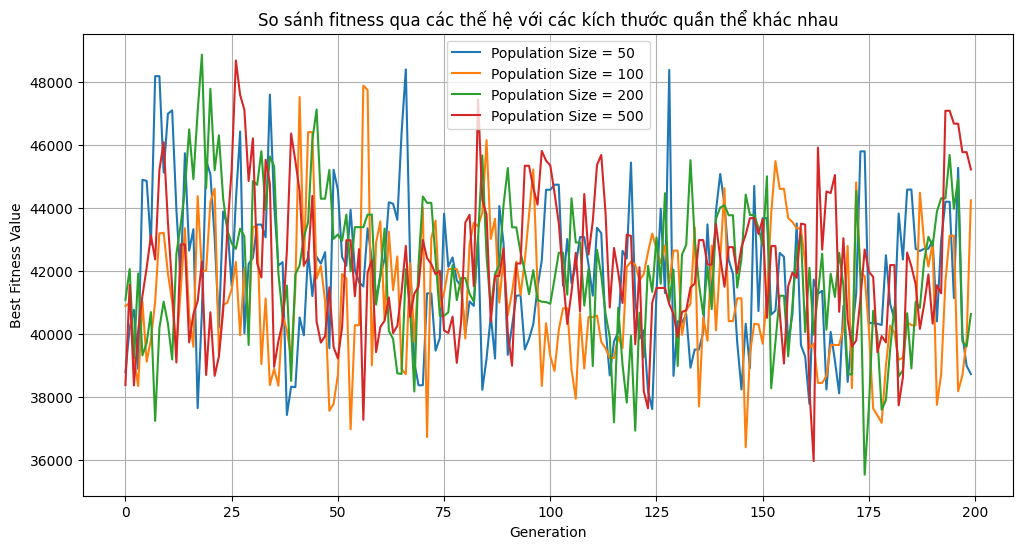

In [92]:
plt.figure(figsize=(12, 6))
for pop_size in population_sizes:
    plt.plot(experiment_results[pop_size]['fitness_history'], 
             label=f'Population Size = {pop_size}')

plt.xlabel('Generation')
plt.ylabel('Best Fitness Value')
plt.title('So sánh fitness qua các thế hệ với các kích thước quần thể khác nhau')
plt.legend()
plt.grid(True)
plt.show()

### Bảng kết quả

| Population Size                 | Best Fitness                                              | Convergence Speed                                            |
|----------------------------------|-----------------------------------------------------------|-------------------------------------------------------------|
| Kích thước quần thể (số cá thể) | Fitness tốt nhất trong quần thể tại một thế hệ nhất định | Tốc độ hội tụ (số thế hệ hoặc thời gian để đạt mức tối ưu)  |

In [93]:
# Hiển thị bảng kết quả chi tiết
print("\nKết quả chi tiết:")
print("-" * 60)
print(f"| {'Population Size':^15} | {'Best Fitness':^15} | {'Convergence Speed':^20} |")
print("-" * 60)

for pop_size in population_sizes:
    history = experiment_results[pop_size]['fitness_history']
    final_fitness = history[-1]
    
    # Tính tốc độ hội tụ (số thế hệ để đạt 95% fitness cuối cùng)
    convergence_gen = next(
        (i for i, x in enumerate(history) if x >= 0.95 * final_fitness), 
        len(history)
    )
    
    print(f"| {pop_size:^15} | {final_fitness:^15} | {convergence_gen:^20} |")

print("-" * 60)


Kết quả chi tiết:
------------------------------------------------------------
| Population Size |  Best Fitness   |  Convergence Speed   |
------------------------------------------------------------
|       50        |      38720      |          0           |
|       100       |      44233      |          8           |
|       200       |      40624      |          0           |
|       500       |      45214      |          6           |
------------------------------------------------------------


### Phân tích độ ổn định của fitness qua các thế hệ

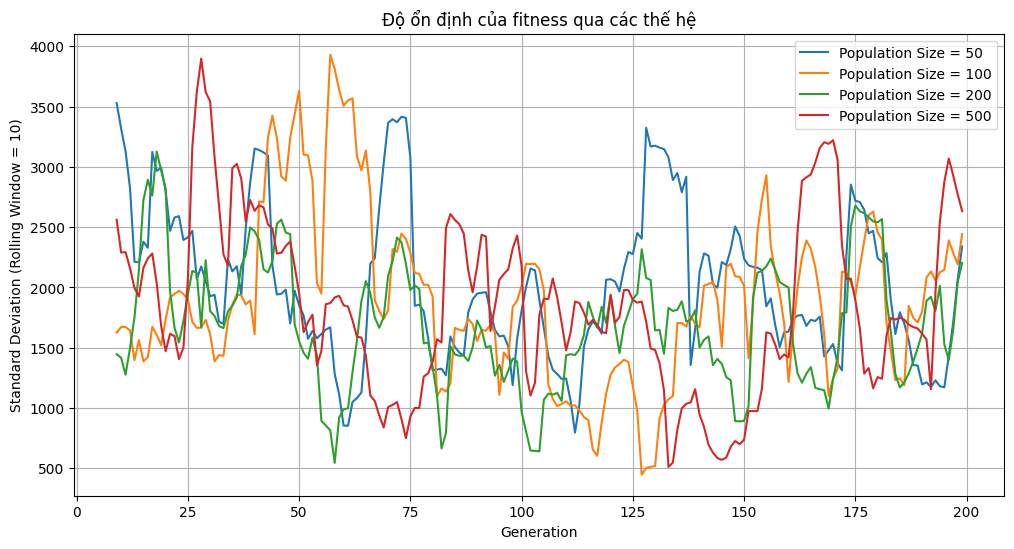

In [94]:
# Phân tích thêm về tính ổn định
plt.figure(figsize=(12, 6))
for pop_size in population_sizes:
    history = experiment_results[pop_size]['fitness_history']
    # Tính độ dao động của fitness
    rolling_std = pd.Series(history).rolling(window=10).std()
    plt.plot(rolling_std, label=f'Population Size = {pop_size}')

plt.xlabel('Generation')
plt.ylabel('Standard Deviation (Rolling Window = 10)')
plt.title('Độ ổn định của fitness qua các thế hệ')
plt.legend()
plt.grid(True)
plt.show()

### Tổng Kết Sau Khi Thí Nghiệm

In [95]:
# Tổng kết
for pop_size in population_sizes:
    history = experiment_results[pop_size]['fitness_history']
    final_fitness = history[-1]
    
    print(f"\nKích thước quần thể {pop_size}:")
    print(f"- Fitness cuối cùng: {final_fitness}")
    print(f"- Tốc độ hội tụ: {next((i for i, x in enumerate(history) if x >= 0.95 * final_fitness), len(history))} thế hệ")
    print(f"- Độ ổn định (std): {np.std(history):.2f}")


Kích thước quần thể 50:
- Fitness cuối cùng: 38720
- Tốc độ hội tụ: 0 thế hệ
- Độ ổn định (std): 2329.90

Kích thước quần thể 100:
- Fitness cuối cùng: 44233
- Tốc độ hội tụ: 8 thế hệ
- Độ ổn định (std): 2147.20

Kích thước quần thể 200:
- Fitness cuối cùng: 40624
- Tốc độ hội tụ: 0 thế hệ
- Độ ổn định (std): 2226.23

Kích thước quần thể 500:
- Fitness cuối cùng: 45214
- Tốc độ hội tụ: 6 thế hệ
- Độ ổn định (std): 2235.49


---
# Phân tích và đánh giá
---